# K-Means Clustering for Default Boxes

In [1]:
import glob
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import xml.etree.ElementTree as ET
from random import randint
from sklearn.cluster import KMeans

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
obd_src = glob.glob("../../bdd100k/bdd100k/images/100k/train/*.jpg")

In [5]:
obd_name = []

num_obd = 0

for obd in obd_src:
    num_obd += 1
    obd_basename = os.path.basename(obd)
    obd_onlyname = os.path.splitext(obd_basename)

    obd_name.append(obd_onlyname[0])
    
print(num_obd)

80421


In [6]:
img_info = []

for name in obd_name:
    xml_path = "../../bdd100k/bdd100k/xml/train/" + name + ".xml"

    with open(xml_path, "r") as new_f:
        root = ET.parse(xml_path).getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            # if obj_name == "person":
            bndbox = obj.find('bndbox')
            left = bndbox.find('xmin').text
            top = bndbox.find('ymin').text
            right = bndbox.find('xmax').text
            bottom = bndbox.find('ymax').text

            img_info.append([obj_name, left, top, right, bottom])

print("Num of Objs: ", len(img_info))

Num of Objs:  1728622


In [9]:
box_w = []
box_h = []

for box in img_info:
    box_w.append(int(box[3]) - int(box[1]))
    box_h.append(int(box[4]) - int(box[2]))

In [28]:
print(box_w[:10])

[14, 91, 6, 178, 13, 12, 10, 12, 35, 18]


In [30]:
print(np.array(box_w).shape)
print(np.array(box_h).shape)

(1728622,)
(1728622,)


In [57]:
box_sizes = []

for i in range(len(box_w)):
    box_sizes.append((int(box_w[i]), int(box_h[i])))

In [60]:
box_sizes_array = np.array(box_sizes)

In [61]:
print(box_sizes_array.shape)

(1728622, 2)


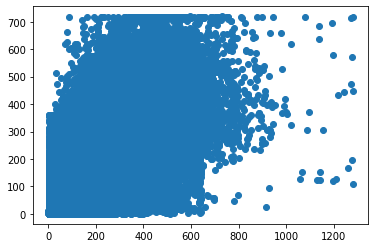

In [63]:
plt.scatter(box_sizes_array[:,0], box_sizes_array[:,1], label='True Position')

In [66]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(box_sizes_array)

KMeans(n_clusters=6)

In [67]:
print(kmeans.cluster_centers_)

[[ 61.71258844  60.47579592]
 [289.35529204 179.17602901]
 [ 21.96325564  22.79405422]
 [151.11738297  94.1544037 ]
 [428.62636074 354.0335961 ]
 [129.39122008 226.6351673 ]]
